In [1]:
# Prepare a classification model using Naive Bayes 
#for salary data 

#Data Description:

#age -- age of a person
#workclass	-- A work class is a grouping of work 
#education	-- Education of an individuals	
#maritalstatus -- Marital status of an individulas	
#occupation	 -- occupation of an individuals
#relationship -- 	
#race --  Race of an Individual
#sex --  Gender of an Individual
#capitalgain --  profit received from the sale of an investment	
#capitalloss	-- A decrease in the value of a capital asset
#hoursperweek -- number of hours work per week	
#native -- Native of an individual
#Salary -- salary of an individual

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.metrics import confusion_matrix 

In [3]:
salary = pd.read_csv("D:/DataScience/regression/NAIVE-BAYES/SalaryData_Train.csv")

In [4]:
salary.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
salary2 = pd.read_csv("D:/DataScience/regression/NAIVE-BAYES/SalaryData_Test.csv")

In [6]:
salary2.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [11]:
salary.shape

(30161, 14)

In [12]:
salary2.shape

(15060, 14)

In [13]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
age              30161 non-null int64
workclass        30161 non-null object
education        30161 non-null object
educationno      30161 non-null int64
maritalstatus    30161 non-null object
occupation       30161 non-null object
relationship     30161 non-null object
race             30161 non-null object
sex              30161 non-null object
capitalgain      30161 non-null int64
capitalloss      30161 non-null int64
hoursperweek     30161 non-null int64
native           30161 non-null object
Salary           30161 non-null object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [14]:
categorical = [var for var in salary.columns if salary[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [15]:
salary[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [16]:
# check missing values in categorical variables

salary[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

In [17]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(salary[var].value_counts())

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other

In [19]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(salary[var].value_counts()/np.float(len(salary)))

 Private             0.738868
 Self-emp-not-inc    0.082855
 Local-gov           0.068532
 State-gov           0.042406
 Self-emp-inc        0.035609
 Federal-gov         0.031266
 Without-pay         0.000464
Name: workclass, dtype: float64
 HS-grad         0.326249
 Some-college    0.221379
 Bachelors       0.167236
 Masters         0.053944
 Assoc-voc       0.043334
 11th            0.034747
 Assoc-acdm      0.033421
 10th            0.027187
 7th-8th         0.018468
 Prof-school     0.017970
 9th             0.015086
 12th            0.012500
 Doctorate       0.012433
 5th-6th         0.009549
 1st-4th         0.005006
 Preschool       0.001492
Name: education, dtype: float64
 Married-civ-spouse       0.466331
 Never-married            0.322436
 Divorced                 0.139717
 Separated                0.031133
 Widowed                  0.027420
 Married-spouse-absent    0.012267
 Married-AF-spouse        0.000696
Name: maritalstatus, dtype: float64
 Prof-specialty       0.13388

In [20]:
# check labels in workclass variable

salary.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [22]:
# check frequency distribution of values in workclass variable

salary.workclass.value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [24]:
# check labels in occupation variable
salary.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [25]:
# check frequency distribution of values in occupation variable

salary.occupation.value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [27]:
salary.native.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [28]:
salary[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

In [29]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(salary[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels
Salary  contains  2  labels


In [31]:
# find numerical variables
numerical = [var for var in salary.columns if salary[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 5 numerical variables

The numerical variables are : ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [32]:
# view the numerical variables

salary[numerical].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [33]:
salary[numerical].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

In [36]:
X = salary.drop(['Salary'], axis=1)

y = salary['Salary']

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [38]:
X_train.shape, X_test.shape

((21112, 13), (9049, 13))

In [39]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [40]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [41]:
X_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native
8166,Local-gov,Some-college,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
7138,Private,Some-college,Never-married,Other-service,Own-child,White,Male,United-States
437,Private,HS-grad,Never-married,Transport-moving,Not-in-family,White,Male,United-States
5436,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
6541,Self-emp-not-inc,HS-grad,Married-civ-spouse,Tech-support,Husband,White,Male,United-States


In [43]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [44]:
import category_encoders as ce

In [47]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 
                                 'race', 'sex', 'native'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [48]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
8166,54,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7138,21,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
437,30,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5436,42,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6541,37,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [49]:
X_train.shape

(21112, 102)

In [50]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
25338,21,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
18840,21,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8391,56,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18258,43,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16669,53,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [51]:
X_test.shape

(9049, 102)

In [52]:
cols = X_train.columns

In [53]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [54]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [55]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [56]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,0.894737,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.842105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.368421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.263158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [58]:
y_pred = gnb.predict(X_test)

y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [59]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7995


In [60]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [61]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8023


In [62]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8023
Test set score: 0.7995


In [63]:
y_test.value_counts()

 <=50K    6798
 >50K     2251
Name: Salary, dtype: int64

In [66]:
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[5422 1376]
 [ 438 1813]]

True Positives(TP) =  5422

True Negatives(TN) =  1813

False Positives(FP) =  1376

False Negatives(FN) =  438


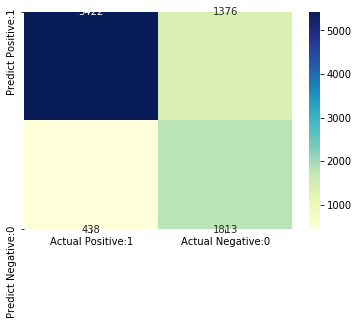

In [68]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sb.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86      6798
        >50K       0.57      0.81      0.67      2251

    accuracy                           0.80      9049
   macro avg       0.75      0.80      0.76      9049
weighted avg       0.84      0.80      0.81      9049



In [70]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [71]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7995


In [72]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2005


In [73]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.7976


In [74]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9253


In [75]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9253


In [76]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4315


In [77]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5685


In [78]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[9.99955511e-01, 4.44887598e-05],
       [9.95935549e-01, 4.06445120e-03],
       [8.63901480e-01, 1.36098520e-01],
       [9.99999906e-01, 9.37239455e-08],
       [8.80888343e-02, 9.11911166e-01],
       [9.99562896e-01, 4.37103927e-04],
       [5.34482750e-06, 9.99994655e-01],
       [6.28497161e-01, 3.71502839e-01],
       [5.46536963e-04, 9.99453463e-01],
       [9.99999570e-01, 4.30495598e-07]])

In [80]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,0.999956,4.448876e-05
1,0.995936,4.064451e-03
2,0.863901,1.360985e-01
3,1.000000,9.372395e-08
4,0.088089,9.119112e-01
5,0.999563,4.371039e-04
6,0.000005,9.999947e-01
7,0.628497,3.715028e-01
8,0.000547,9.994535e-01
9,1.000000,4.304956e-07


In [81]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(X_test)[0:10, 1]

array([4.44887598e-05, 4.06445120e-03, 1.36098520e-01, 9.37239455e-08,
       9.11911166e-01, 4.37103927e-04, 9.99994655e-01, 3.71502839e-01,
       9.99453463e-01, 4.30495598e-07])

In [82]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

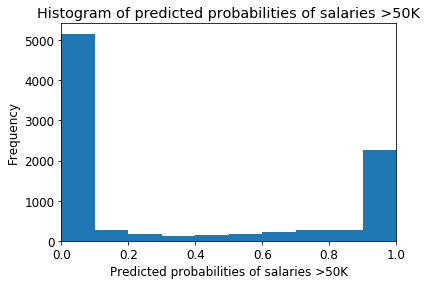

In [85]:
# plot histogram of predicted probabilities
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

C:\Users\agnis\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


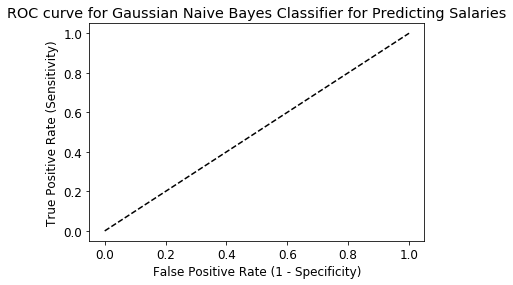

In [86]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '>50K')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [87]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8902


In [89]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8923


In [88]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.81676136 0.79829545 0.79024621 0.81202652 0.80492424 0.79062056
 0.80909522 0.792891   0.79620853 0.80900474]
